In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

earth_density    = 5.51   # [g/cm**3]

In [2]:
dataEA = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Exoplanet_Archive.csv",delimiter=",")
dataLI = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\STPM_improved_210721.csv",delimiter=",")
planet_name_LI        = list(dataLI["Star"]+" "+dataLI["Planet"])

earth_like_rocky  = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\Earth-like Rocky (32.5% Fe+67.5% MgSiO3).txt",delimiter = "\t")
H20_50_500K       = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\50% H2O (50% Earth-like rocky core + 50% H2O layer by mass)_500 K_1mili-bar surface temprture.txt",delimiter = "\t")

In [3]:
# Luque Impoved
planet_id_LI         = dataLI.ID
star_name_LI         = dataLI.Star
planet_letter_LI     = dataLI.Planet

radius_LI            = dataLI.R_Rterra            # [Earth Radius]
radius_unc_up_LI     = dataLI.euR_Rterra          # [Earth Radius] Upper Unc.
radius_unc_low_LI    = dataLI.edR_Rterra          # [Earth Radius] Lower Unc.

mass_LI              = dataLI.M_Mterra            # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_LI       = dataLI.euM_Mterra          # [Earth Mass] Upper Unc.
mass_unc_low_LI      = dataLI.edM_Mterra          # [Earth Mass] Lower Unc.

density_LI           = dataLI[dataLI.columns[32]]  # [g/cm**3]
density_unc_up_LI    = dataLI[dataLI.columns[33]]  # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_LI   = dataLI[dataLI.columns[34]]  # [g/cm**3] Planet Density Lower Unc
pl_eq_LI             = dataLI.Teq_K                # [K] Equilibrium Temperature


# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))

radius_EA            = dataEA.pl_rade            # [Earth Radius]
period_EA            = dataEA.pl_orbper          # [days]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.
mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]

mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
st_spectype_EA       = dataEA.st_spectype        # Spectral type of star
pl_eq_EA             = dataEA.pl_eqt             # [K] Equilibrium Temperature

for i in range(0,len(planet_name_LI)):
    if planet_name_LI[i] == 'CD-60 8051 b':
        planet_name_LI[i] = 'L 168-9 b'
    if planet_name_LI[i] == 'GJ 3053 b':
        planet_name_LI[i] = 'LHS 1140 b'
    if planet_name_LI[i] == 'GJ 3053 c':
        planet_name_LI[i] = 'LHS 1140 c'

##### Use the Luque values for planets in that sample #### 
for i in range(0,len(planet_name_EA)):
    if planet_name_EA[i] in planet_name_LI:
        LI_index              = planet_name_LI.index(planet_name_EA[i])
        
        pl_eq_EA[i]           = pl_eq_LI[LI_index]
        mass_EA[i]            = mass_LI[LI_index]
        mass_unc_up_EA[i]     = mass_unc_up_LI[LI_index]
        mass_unc_low_EA[i]    = mass_unc_low_LI[LI_index]
        
        radius_EA[i]          = radius_LI[LI_index]
        radius_unc_up_EA[i]   = radius_unc_up_LI[LI_index]      
        radius_unc_low_EA[i]  = radius_unc_low_LI[LI_index]    

        density_EA[i]         = density_LI[LI_index]  
        density_unc_up_EA[i]  = density_unc_up_LI[LI_index]  
        density_unc_low_EA[i] = density_unc_low_LI[LI_index] 
        st_spectype_EA[i]     = "M"

# Filters

### Choose LIV34

In [4]:
def liv34(EA_planets):
    LIV34_planets = ["K2-146 b",'TRAPPIST-1 h', 'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f', 'TRAPPIST-1 g', 'TRAPPIST-1 c', 'TRAPPIST-1 b', 'GJ 1132 b', 'TOI-270 b', 'LHS 1140 c', 'GJ 1252 b', 'GJ 357 b', 'LTT 3780 b', 'LHS 1478 b', 'GJ 486 b', 'GJ 3473 b', 'L 168-9 b', 'L 98-59 c', 'L 98-59 d', 'LHS 1140 b', 'TOI-270 d', 'TOI-776 b', 'TOI-1634 b', 'TOI-1685 b', 'TOI-1235 b', 'K2-146 c', 'LTT 3780 c', 'TOI-270 c', 'K2-18 b', 'TOI-269 b', 'GJ 1214 b', 'K2-25 b', 'TOI-1231 b'] 
    planet      = []; planet_i      = []; planet_eq   = []; 
    radius      = []; radius_up     = []; radius_low  = []
    mass        = []; mass_up       = []; mass_low    = []
    density     = []; density_up    = []; density_low = []
    
    for i in range(0,len(EA_planets)):
        if EA_planets[i] in LIV34_planets:
            index  = list(planet_name_EA).index(EA_planets[i]); planet.append(dataEA.pl_name[index])
            planet_eq.append(pl_eq_EA[i])
            radius.append(dataEA.pl_rade[index]); radius_up.append(dataEA.pl_radeerr1[index]); radius_low.append(dataEA.pl_radeerr2[index])
            density.append(dataEA.pl_dens[index]); density_up.append(dataEA.pl_denserr1[index]); density_low.append(dataEA.pl_denserr2[index])
            mass.append(dataEA.pl_bmasse[index]); mass_up.append(dataEA.pl_bmasseerr1[index]);  mass_low.append(dataEA.pl_bmasseerr2[index])
    return index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low,planet_eq

## Plot data

In [33]:
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low,planet_eq = liv34(planet_name_EA)
planet2      = []; planet_i2       = []; planet_eq2   = []
radius2      = []; radius_up2      = []; radius_low2  = []
mass2        = []; mass_up2        = []; mass_low2    = []
density2     = []; density_up2     = []; density_low2 = []

radius2 = []
planet2 = []
for i in range(0,len(planet_name_EA)):
    if ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.2 and  radius_EA[i]<4 and "M" in str(st_spectype_EA[i]):
        if ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.2:
            if planet_name_EA[i] not in planet:
                planet_eq2.append(pl_eq_EA[i]); planet2.append(planet_name_EA[i])
                radius2.append(dataEA.pl_rade[i]); radius_up2.append(dataEA.pl_radeerr1[i]); radius_low2.append(dataEA.pl_radeerr2[i])
                density2.append(dataEA.pl_dens[i]); density_up2.append(dataEA.pl_denserr1[i]); density_low2.append(dataEA.pl_denserr2[i])
                mass2.append(dataEA.pl_bmasse[i]); mass_up2.append(dataEA.pl_bmasseerr1[i]);  mass_low2.append(dataEA.pl_bmasseerr2[i])
                
mass_error_plus = mass_up
mass_error_minus = np.abs(mass_low)
radius_error_plus = radius_up
radius_error_minus = np.abs(radius_low)
density_error_plus = np.divide(density_up,earth_density)
density_error_minus = np.divide(np.abs(density_low),earth_density)
planet_eq = planet_eq 

mass_error_plus2 = mass_up2
mass_error_minus2 = np.abs(mass_low2)
density_error_plus2 = np.divide(density_up2,earth_density)
density_error_minus2= np.divide(np.abs(density_low2),earth_density)
radius_error_plus2 = radius_up2
radius_error_minus2 = np.abs(radius_low2)

planet3      = []; planet_i3       = []; planet_eq3   = []
radius3      = []; radius_up3      = []; radius_low3  = []
mass3        = []; mass_up3        = []; mass_low3    = []
density3     = []; density_up3     = []; density_low3 = []
for i in range(0,len(planet_name_EA)):
    if ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.33 and  radius_EA[i]<4 and "M" in str(st_spectype_EA[i]):
        if ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.33:
            if planet_name_EA[i] not in planet:
                planet_eq3.append(pl_eq_EA[i]); planet3.append(planet_name_EA[i])
                radius3.append(dataEA.pl_rade[i]); radius_up3.append(dataEA.pl_radeerr1[i]); radius_low3.append(dataEA.pl_radeerr2[i])
                density3.append(dataEA.pl_dens[i]); density_up3.append(dataEA.pl_denserr1[i]); density_low3.append(dataEA.pl_denserr2[i])
                mass3.append(dataEA.pl_bmasse[i]); mass_up3.append(dataEA.pl_bmasseerr1[i]);  mass_low3.append(dataEA.pl_bmasseerr2[i])

mass_error_plus3    = mass_up3
mass_error_minus3   = np.abs(mass_low3)
density_error_plus3 = np.divide(density_up3,earth_density)
density_error_minus3= np.divide(np.abs(density_low3),earth_density)
radius_error_plus3  = radius_up3
radius_error_minus3 = np.abs(radius_low3)

planet_combined     = planet + planet2
planet_eq_combined  = planet_eq + planet_eq2

radius_combined     = radius + radius2
radius_up_combined  = radius_up + radius_up2
radius_low_combined = radius_low + radius_low2

mass_combined      = mass + mass2
mass_up_combined   = mass_up + mass_up2
mass_low_combined  = mass_low + mass_low2

density_combined      = density + density2
density_up_combined   = density_up + density_up2
density_low_combined  = density_low + density_low2

mass_error_plus_combined    = mass_up_combined
mass_error_minus_combined   = np.abs(mass_low_combined)
density_error_plus_combined = np.divide(density_up_combined,earth_density)
density_error_minus_combined= np.divide(np.abs(density_low_combined),earth_density)
radius_error_plus_combined  = radius_up_combined
radius_error_minus_combined = np.abs(radius_low_combined)

planet_combined33     = planet + planet3
planet_eq_combined33  = planet_eq + planet_eq3

radius_combined33     = radius + radius3
radius_up_combined33  = radius_up + radius_up3
radius_low_combined33 = radius_low + radius_low3

mass_combined33      = mass + mass3
mass_up_combined33   = mass_up + mass_up3
mass_low_combined33  = mass_low + mass_low3

density_combined33      = density + density3
density_up_combined33   = density_up + density_up3
density_low_combined33  = density_low + density_low3

mass_error_plus_combined33    = mass_up_combined33
mass_error_minus_combined33   = np.abs(mass_low_combined33)
density_error_plus_combined33 = np.divide(density_up_combined33,earth_density)
density_error_minus_combined33= np.divide(np.abs(density_low_combined33),earth_density)
radius_error_plus_combined33  = radius_up_combined33
radius_error_minus_combined33 = np.abs(radius_low_combined33)


comined_label = []
for i in range(0,len(mass)):
    comined_label.append("LIV34")
for i in range(0,len(mass2)):
    comined_label.append("EA add")

relative_mass_error1 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass, mass_error_plus)]
relative_density_error1 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(density, density_error_plus)]
relative_radius_error1 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius, radius_error_plus)]

hover_text1 = [
    f"Dataset: LIV34<br>Planet: {planet[i]}<br>Mass: {mass[i]} +{mass_error_plus[i]:.2f} -{mass_error_minus[i]:.2f} ({relative_mass_error1[i]*100:.2f}% relative error)<br>Density: {density[i]:.2f} +{density_error_plus[i]:.2f} -{density_error_minus[i]:.2f} ({relative_density_error1[i]*100:.2f}% relative error)<br>Radius: {radius[i]} +{radius_error_plus[i]:.2f} -{radius_error_minus[i]:.2f} ({relative_radius_error1[i]*100:.2f}% relative error)"
    for i in range(len(mass))
]

# Create the plot for Data 1
scatter1 = go.Scatter(
    x=mass,
    y=np.divide(density, earth_density),
    mode='markers',
    text=hover_text1,
    error_x=dict(type='data', array=mass_error_plus, arrayminus=mass_error_minus, visible=True),
    error_y=dict(type='data', array=density_error_plus, arrayminus=density_error_minus, visible=True),
    marker=dict(color=planet_eq,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',  
        showscale=True),
    name='Mass, Density - Data 1',
    hoverinfo ="text"
)
scatter1.marker['size'] = 12  # Adjust the size of the markers
scatter1.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatter1.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

hover_text4 = [
    f"Dataset: LIV34<br>Planet: {planet[i]}<br>Mass: {mass[i]} +{mass_error_plus[i]:.2f} -{mass_error_minus[i]:.2f} ({relative_mass_error1[i]*100:.2f}% relative error)<br>Density: {density[i]:.2f} +{density_error_plus[i]:.2f} -{density_error_minus[i]:.2f} ({relative_density_error1[i]*100:.2f}% relative error)<br>Radius: {radius[i]} +{radius_error_plus[i]:.2f} -{radius_error_minus[i]:.2f} ({relative_radius_error1[i]*100:.2f}% relative error)"
    for i in range(len(mass))
]

# Create the plot for Data 1
scatterRM1 = go.Scatter(
    x=mass,
    y=radius,
    mode='markers',
    text=hover_text4,
    error_x=dict(type='data', array=mass_error_plus, arrayminus=mass_error_minus, visible=True),
    error_y=dict(type='data', array=radius_error_plus, arrayminus=radius_error_minus, visible=True),
    marker=dict(color=planet_eq,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',  
        showscale=True),
    name='Mass, Radius - Data 4',
    hoverinfo ="text"
)
scatterRM1.marker['size'] = 12  # Adjust the size of the markers
scatterRM1.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatterRM1.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)


################################################# EA ADD ############################################################
# Create hover text for Data 2 indicating the dataset
relative_mass_error2 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass2, mass_error_plus2)]
relative_density_error2 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(density2, density_error_plus2)]
relative_radius_error2 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius2, radius_error_plus2)]

# Update hover text for Data 2 with radius, errors, and relative errors
hover_textRM2 = [
    f"Dataset: EA add<br>Planet: {planet2[i]}<br>Mass: {mass2[i]} +{mass_error_plus2[i]:.2f} -{mass_error_minus2[i]:.2f} ({relative_mass_error2[i]*100:.2f}% relative error)<br>Density: {density2[i]:.2f} +{density_error_plus2[i]:.2f} -{density_error_minus2[i]:.2f} ({relative_density_error2[i]*100:.2f}% relative error)<br>Radius: {radius2[i]} +{radius_error_plus2[i]:.2f} -{radius_error_minus2[i]:.2f} ({relative_radius_error2[i]*100:.2f}% relative error)"
    for i in range(len(mass2))
]

# Create the plot for Data 2
scatterRM2 = go.Scatter(
    x=mass2,
    y=radius2,
    mode='markers',
    text=hover_textRM2,
    error_x=dict(type='data', array=mass_error_plus2, arrayminus=mass_error_minus2, visible=True),
    error_y=dict(type='data', array=radius_error_plus2, arrayminus=radius_error_minus2, visible=True),
    marker=dict(color=planet_eq2,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',  
        showscale=True),
    name='Mass, Density - Data 2',
    hoverinfo ="text"
)
scatterRM2.marker['size'] = 12  # Adjust the size of the markers
scatterRM2.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatterRM2.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

# Update hover text for Data 2 with radius, errors, and relative errors
hover_text2 = [
    f"Dataset: EA add<br>Planet: {planet2[i]}<br>Mass: {mass2[i]} +{mass_error_plus2[i]:.2f} -{mass_error_minus2[i]:.2f} ({relative_mass_error2[i]*100:.2f}% relative error)<br>Density: {density2[i]:.2f} +{density_error_plus2[i]:.2f} -{density_error_minus2[i]:.2f} ({relative_density_error2[i]*100:.2f}% relative error)<br>Radius: {radius2[i]} +{radius_error_plus2[i]:.2f} -{radius_error_minus2[i]:.2f} ({relative_radius_error2[i]*100:.2f}% relative error)"
    for i in range(len(mass2))
]

# Create the plot for Data 2
scatter2 = go.Scatter(
    x=mass2,
    y=np.divide(density2, earth_density),
    mode='markers',
    text=hover_text2,
    error_x=dict(type='data', array=mass_error_plus2, arrayminus=mass_error_minus2, visible=True),
    error_y=dict(type='data', array=density_error_plus2, arrayminus=density_error_minus2, visible=True),
    marker=dict(color=planet_eq2,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',  
        showscale=True),
    name='Mass, Density - Data 2',
    hoverinfo ="text"
)
scatter2.marker['size'] = 12  # Adjust the size of the markers
scatter2.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatter2.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

# Create hover text for Data 2 indicating the dataset
relative_mass_error3 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass3, mass_error_plus3)]
relative_density_error3 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(density3, density_error_plus3)]
relative_radius_error3 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius3, radius_error_plus3)]

# Update hover text for Data 2 with radius, errors, and relative errors
hover_text3 = [
    f"Dataset: EA add 30%<br>Planet: {planet3[i]}<br>Mass: {mass3[i]} +{mass_error_plus3[i]:.2f} -{mass_error_minus3[i]:.2f} ({relative_mass_error3[i]*100:.2f}% relative error)<br>Density: {density3[i]:.2f} +{density_error_plus3[i]:.2f} -{density_error_minus3[i]:.2f} ({relative_density_error3[i]*100:.2f}% relative error)<br>Radius: {radius3[i]} +{radius_error_plus3[i]:.2f} -{radius_error_minus3[i]:.2f} ({relative_radius_error3[i]*100:.2f}% relative error)"
    for i in range(len(mass3))
]

# Create the plot for Data 3
scatter3 = go.Scatter(
    x=mass3,
    y=np.divide(density3, earth_density),
    mode='markers',
    text=hover_text3,
    error_x=dict(type='data', array=mass_error_plus3, arrayminus=mass_error_minus3, visible=True),
    error_y=dict(type='data', array=density_error_plus3, arrayminus=density_error_minus3, visible=True),
    marker=dict(color=planet_eq3,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',  
        showscale=True),
    name='Mass, Density - Data 3',
    hoverinfo ="text"
)
scatter3.marker['size'] = 12  # Adjust the size of the markers
scatter3.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatter3.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

# Update hover text for Data 2 with radius, errors, and relative errors
hover_textRM3 = [
    f"Dataset: EA add 30%<br>Planet: {planet3[i]}<br>Mass: {mass3[i]} +{mass_error_plus3[i]:.2f} -{mass_error_minus3[i]:.2f} ({relative_mass_error3[i]*100:.2f}% relative error)<br>Density: {density3[i]:.2f} +{density_error_plus3[i]:.2f} -{density_error_minus3[i]:.2f} ({relative_density_error3[i]*100:.2f}% relative error)<br>Radius: {radius3[i]} +{radius_error_plus3[i]:.2f} -{radius_error_minus3[i]:.2f} ({relative_radius_error3[i]*100:.2f}% relative error)"
    for i in range(len(mass3))
]

# Create the plot for Data 3
scatterRM3 = go.Scatter(
    x=mass3,
    y=radius3,
    mode='markers',
    text=hover_textRM3,
    error_x=dict(type='data', array=mass_error_plus3, arrayminus=mass_error_minus3, visible=True),
    error_y=dict(type='data', array=radius_error_plus3, arrayminus=radius_error_minus3, visible=True),
    marker=dict(color=planet_eq3,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',  
        showscale=True),
    name='Mass, Density - Data 3',
    hoverinfo ="text"
)
scatterRM3.marker['size'] = 12  # Adjust the size of the markers
scatterRM3.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatterRM3.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)


#### Combined data #### 
relative_mass_error_combined = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass_combined, mass_error_plus_combined)]
relative_density_error_combined = [error / density_val if density_val != 0 else 0 for density_val, error in zip(density_combined, density_error_plus_combined)]
relative_radius_error_combined = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius_combined, radius_error_plus_combined)]
hover_text_combined = [
    f"Dataset: {comined_label[i]}<br>Planet: {planet_combined[i]}<br>Mass: {mass_combined[i]} +{mass_error_plus_combined[i]:.2f} -{mass_error_minus_combined[i]:.2f} ({relative_mass_error_combined[i]*100:.2f}% relative error)<br>Density: {density_combined[i]:.2f} +{density_error_plus_combined[i]:.2f} -{density_error_minus_combined[i]:.2f} ({relative_density_error_combined[i]*100:.2f}% relative error)<br>Radius: {radius_combined[i]} +{radius_error_plus_combined[i]:.2f} -{radius_error_minus_combined[i]:.2f} ({relative_radius_error_combined[i]*100:.2f}% relative error)"
    for i in range(len(mass_combined))
]

    
# Create the plot for Combined Data
scattercombined = go.Scatter(
    x=mass_combined,
    y=np.divide(density_combined, earth_density),
    mode='markers',
    text=hover_text_combined,
    error_x=dict(type='data', array=mass_error_plus_combined, arrayminus=mass_error_minus_combined, visible=True),
    error_y=dict(type='data', array=density_error_plus_combined, arrayminus=density_error_minus_combined, visible=True),
    marker=dict(color=planet_eq_combined,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',  
        showscale=True),
    name='Mass, Density - Combined Data',
    hoverinfo="text"
)
scattercombined.marker['size'] = 12  # Adjust the size of the markers
scattercombined.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scattercombined.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

hover_text_combinedRM = [
    f"Dataset: {comined_label[i]}<br>Planet: {planet_combined[i]}<br>Mass: {mass_combined[i]} +{mass_error_plus_combined[i]:.2f} -{mass_error_minus_combined[i]:.2f} ({relative_mass_error_combined[i]*100:.2f}% relative error)<br>Density: {density_combined[i]:.2f} +{density_error_plus_combined[i]:.2f} -{density_error_minus_combined[i]:.2f} ({relative_density_error_combined[i]*100:.2f}% relative error)<br>Radius: {radius_combined[i]} +{radius_error_plus_combined[i]:.2f} -{radius_error_minus_combined[i]:.2f} ({relative_radius_error_combined[i]*100:.2f}% relative error)"
    for i in range(len(mass_combined))
]

# Create the plot for Combined Data
scattercombinedRM = go.Scatter(
    x=mass_combined,
    y=radius_combined,
    mode='markers',
    text=hover_text_combinedRM,
    error_x=dict(type='data', array=mass_error_plus_combined, arrayminus=mass_error_minus_combined, visible=True),
    error_y=dict(type='data', array=radius_error_plus_combined, arrayminus=radius_error_minus_combined, visible=True),
    marker=dict(color=planet_eq_combined,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',  
        showscale=True),
    name='Mass, Density - Combined Data',
    hoverinfo="text"
)
scattercombinedRM.marker['size'] = 12  # Adjust the size of the markers
scattercombinedRM.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scattercombinedRM.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

################################### Combined data 33 ####################################
comined_label33 = []
for i in range(0,len(mass)):
    comined_label33.append("LIV34")
for i in range(0,len(mass3)):
    comined_label33.append("EA add 33%")
    
relative_mass_error_combined33 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass_combined33, mass_error_plus_combined33)]
relative_density_error_combined33 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(density_combined33, density_error_plus_combined33)]
relative_radius_error_combined33 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius_combined33, radius_error_plus_combined33)]

hover_text_combined33 = [
    f"Dataset: {comined_label33[i]}<br>Planet: {planet_combined33[i]}<br>Mass: {mass_combined33[i]} +{mass_error_plus_combined33[i]:.2f} -{mass_error_minus_combined33[i]:.2f} ({((mass_error_plus_combined33[i] + mass_error_minus_combined33[i]) / (2 * mass_combined33[i])) * 100:.2f}% relative error)<br>Radius: {radius_combined33[i]} +{radius_error_plus_combined33[i]:.2f} -{radius_error_minus_combined33[i]:.2f} ({((radius_error_plus_combined33[i] + radius_error_minus_combined33[i]) / (2 * radius_combined33[i])) * 100:.2f}% relative error)"
    for i in range(len(mass_combined33))
]
# Create the plot for Combined Data
scattercombined33 = go.Scatter(
    x=mass_combined33,
    y=np.divide(density_combined33, earth_density),
    mode='markers',
    text=hover_text_combined33,
    error_x=dict(type='data', array=mass_error_plus_combined33, arrayminus=mass_error_minus_combined33, visible=True),
    error_y=dict(type='data', array=density_error_plus_combined33, arrayminus=density_error_minus_combined33, visible=True),
    marker=dict(color=planet_eq_combined33,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',  
        showscale=True),
    name='Mass, Density - Combined Data',
    hoverinfo="text"
)
scattercombined33.marker['size'] = 12  # Adjust the size of the markers
scattercombined33.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scattercombined33.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

hover_text_combinedRM33 = [
    f"Dataset: {comined_label33[i]}<br>Planet: {planet_combined33[i]}<br>Mass: {mass_combined33[i]} +{mass_error_plus_combined33[i]:.2f} -{mass_error_minus_combined33[i]:.2f} ({((mass_error_plus_combined33[i] + mass_error_minus_combined33[i]) / (2 * mass_combined33[i])) * 100:.2f}% relative error)<br>Radius: {radius_combined33[i]} +{radius_error_plus_combined33[i]:.2f} -{radius_error_minus_combined33[i]:.2f} ({((radius_error_plus_combined33[i] + radius_error_minus_combined33[i]) / (2 * radius_combined33[i])) * 100:.2f}% relative error)"
    for i in range(len(mass_combined33))
]
# Create the plot for Combined Data
scattercombinedRM33 = go.Scatter(
    x=mass_combined33,
    y=radius_combined33,
    mode='markers',
    text=hover_text_combinedRM33,
    error_x=dict(type='data', array=mass_error_plus_combined33, arrayminus=mass_error_minus_combined33, visible=True),
    error_y=dict(type='data', array=radius_error_plus_combined33, arrayminus=radius_error_minus_combined33, visible=True),
    marker=dict(
        color=planet_eq_combined33,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',  
        showscale=True
    ),
    name='Mass, Density - Combined Data',
    hoverinfo="text"
)
scattercombinedRM33.marker['size'] = 12  # Adjust the size of the markers
scattercombinedRM33.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scattercombinedRM33.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)


##################### end scatters ####################

# Combine both plots and update layout
fig = go.Figure()
fig.add_trace(scatter1)
fig.add_trace(scatterRM1)
fig.add_trace(scatter2)
fig.add_trace(scatterRM2)
fig.add_trace(scatter3)
fig.add_trace(scatterRM3)
fig.add_trace(scattercombined)  
fig.add_trace(scattercombinedRM)  
fig.add_trace(scattercombined33)  
fig.add_trace(scattercombinedRM33)  
scattercombinedRM
# Create a dropdown menu to toggle between datasets
buttons = [
    {
        'method': 'update',
        'label': 'LIV34 (DM)',
        'args': [{'visible': [True, False, False, False, False, False, False, False, False, False]}, {'title': 'LIV34',
              'xaxis': {'title': "$Mass\ [M_{\oplus}]$", 'type': 'log'},
              'yaxis': {'title': "$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$"}}]
    },
    {
    'method': 'update',
    'label': 'LIV34 (RM)',
    'args': [
        {'visible': [False, True, False, False, False, False, False, False, False, False]},
        {'title': 'LIV34',
         'xaxis': {'title': "$Mass\ [M_{\oplus}]$", 'type': 'log'},
         'yaxis': {'title': "$Radius\ [R_{\oplus}]$"}
        }
    ]
    },
    {
        'method': 'update',
        'label': 'EA add (DM)',
        'args': [{'visible': [False, False, True, False, False, False, False, False, False, False]}, {'title': 'EA add',
              'xaxis': {'title': "$Mass\ [M_{\oplus}]$", 'type': 'log'},
              'yaxis': {'title': "$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$"}}]
    },
    {
        'method': 'update',
        'label': 'EA add (RM)',
        'args': [{'visible': [False, False,  False, True, False, False, False, False, False, False]}, {'title': 'EA add',
              'xaxis': {'title': "$Mass\ [M_{\oplus}]$", 'type': 'log'},
              'yaxis': {'title': "$Radius\ [R_{\oplus}]$"}}]
    },
    {
        'method': 'update',
        'label': 'EA add 33% (DM)',
        'args': [{'visible': [False, False, False, False, True,  False, False, False, False, False]}, 
            {'title': 'EA add 33%',
              'xaxis': {'title': "$Mass\ [M_{\oplus}]$", 'type': 'log'},
              'yaxis': {'title': "$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$"}}]
    },
    {
        'method': 'update',
        'label': 'EA add 33% (RM)',
        'args': [{'visible': [False, False, False, False,False, True, False, False, False, False, False]}, 
            {'title': 'EA add 33%',
              'xaxis': {'title': "$Mass\ [M_{\oplus}]$", 'type': 'log'},
              'yaxis': {'title': "$Radius\ [R_{\oplus}]$"}}]
    },
    {
        'method': 'update',
        'label': 'Combined LIV34 + EA add (DM)',
        'args': [{'visible': [False, False, False,  False,False, False, True, False, False, False]}, 
             {'title': 'Combined LIV34 + EA ADD',
              'xaxis': {'title': "$Mass\ [M_{\oplus}]$", 'type': 'log'},
              'yaxis': {'title': "$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$"}}]
    },
    {
        'method': 'update',
        'label': 'Combined LIV34 + EA add (RM)',
        'args': [{'visible': [False, False, False, False, False, False, False, True, False, False]}, 
             {'title': 'Combined LIV34 + EA ADD',
              'xaxis': {'title': "$Mass\ [M_{\oplus}]$", 'type': 'log'},
              'yaxis': {'title': "$Radius\ [R_{\oplus}]$"}}]
    },
    {
        'method': 'update',
        'label': 'Combined LIV34 + EA add 33% (DM)',
        'args': [{'visible': [False, False, False, False, False, False, False, False, True, False]}, 
             {'title': 'Combined LIV34 + EA ADD',
              'xaxis': {'title': "$Mass\ [M_{\oplus}]$", 'type': 'log'},
              'yaxis': {'title': "$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$"}}]
    },
    {
        'method': 'update',
        'label': 'Combined LIV34 + EA add 33% (RM)',
        'args': [{'visible': [False, False, False, False, False, False, False, False, False, True]}, 
             {'title': 'Combined LIV34 + EA ADD 33%',
              'xaxis': {'title': "$Mass\ [M_{\oplus}]$", 'type': 'log'},
              'yaxis': {'title': "$Radius\ [R_{\oplus}]$"}}]
    }
]

fig.update_layout(
    updatemenus=[
        {
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.5,
            'xanchor': 'left',
            'yanchor': 'top'
        },
    ],
    width=800,  # Adjust the width of the figure
    height=600  # Adjust the height of the figure
)

# Display the plot
fig.show()

import ipywidgets as widgets
from IPython.display import display, HTML

# Define lists of planets

planet1 = planet

# Function to generate and display hyperlinks in columns
def generate_planet_links(b, columns=3):
    selected_planet_list = None
    if planet_list_dropdown.value == 'LIV 34':
        selected_planet_list = sorted(planet1)
    elif planet_list_dropdown.value == 'EA add':
        selected_planet_list = sorted(planet2)
    elif planet_list_dropdown.value == 'EA add 33%':
        selected_planet_list = sorted(planet3)

    # Clear previous output
    output.clear_output()

    with output:
        planet_links = []
        for planet in selected_planet_list:
            planet_url = f'https://exoplanetarchive.ipac.caltech.edu/overview/{planet}'
            planet_links.append(f'<a href="{planet_url}" target="_blank">{planet}</a>')

        num_links = len(planet_links)
        links_per_column = (num_links + columns - 1) // columns
        columns_html = []
        for i in range(0, num_links, links_per_column):
            column_links = planet_links[i:i + links_per_column]
            columns_html.append('<div style="float: left; width: 33%;">' + '<br>'.join(column_links) + '</div>')

        links_html = '<div style="overflow: auto;">' + '\n'.join(columns_html) + '</div>'
        display(HTML(links_html))

# Create a dropdown for selecting the planet list
planet_list_dropdown = widgets.Dropdown(options=['LIV 34','EA add', 'EA add 33%'], description='Dataset:')

# Create a button to generate hyperlinks
generate_button = widgets.Button(description='Generate Hyperlinks')

# Output widget for displaying hyperlinks
output = widgets.Output()

# Function to handle button click
def on_button_click(b):
    with output:
        generate_planet_links(None)

# Link the button click event to the function
generate_button.on_click(on_button_click)

# Display the dropdown and button
display(planet_list_dropdown)
display(generate_button)
display(output)

Dropdown(description='Dataset:', options=('LIV 34', 'EA add', 'EA add 33%'), value='LIV 34')

Button(description='Generate Hyperlinks', style=ButtonStyle())

Output()

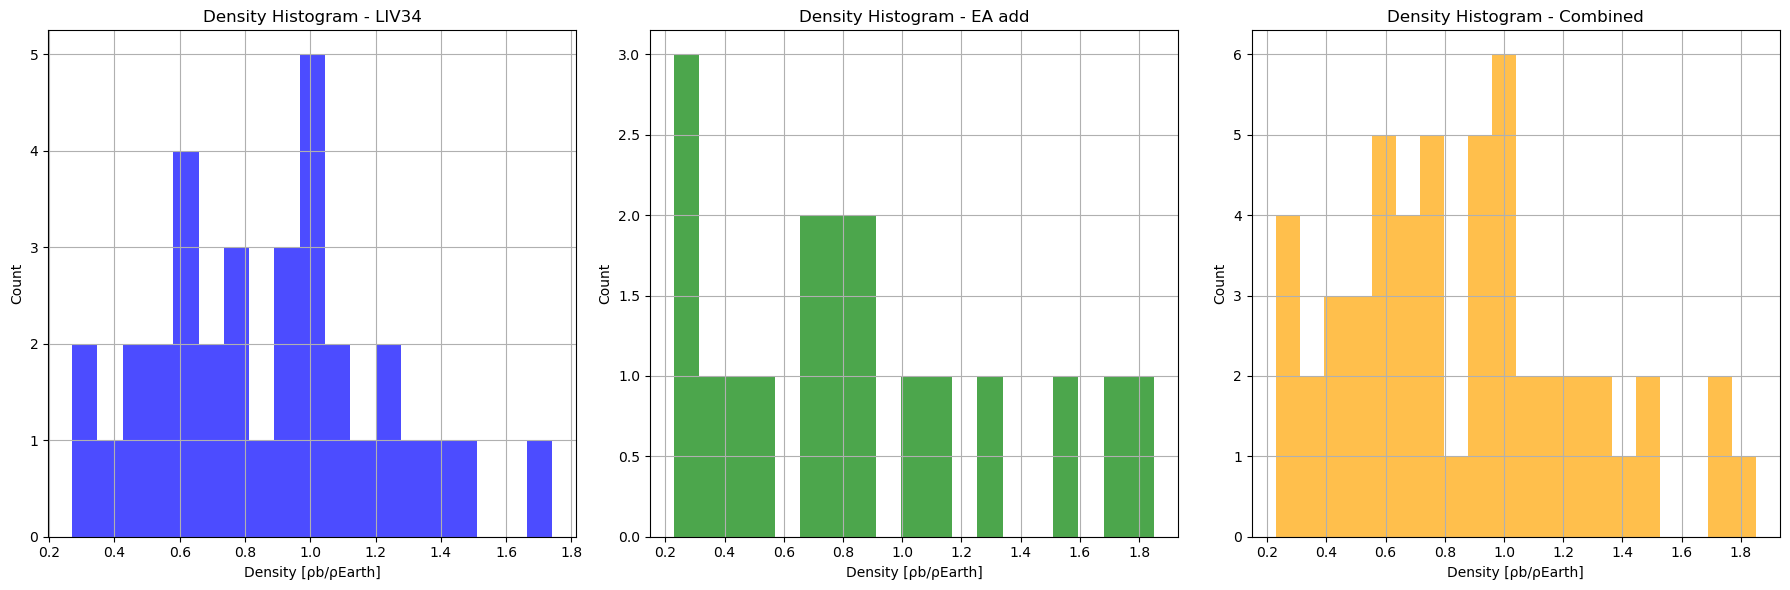

In [54]:
import matplotlib.pyplot as plt

# Data for histograms
density_liv34 = np.divide(density, earth_density)
density_ea_add = np.divide(density2, earth_density)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot histogram for LIV34 data
axs[0].hist(density_liv34, bins=19, alpha=0.7, color='blue')
axs[0].set_xlabel('Density [ρb/ρEarth]')
axs[0].set_ylabel('Count')
axs[0].set_title('Density Histogram - LIV34')
axs[0].grid(True)

# Plot histogram for EA add data
axs[1].hist(density_ea_add, bins=19, alpha=0.7, color='green')
axs[1].set_xlabel('Density [ρb/ρEarth]')
axs[1].set_ylabel('Count')
axs[1].set_title('Density Histogram - EA add')
axs[1].grid(True)

# Combine both datasets for histogram
combined_density = np.concatenate((density_liv34, density_ea_add))

# Plot histogram for combined data
axs[2].hist(combined_density, bins=20, alpha=0.7, color='orange')
axs[2].set_xlabel('Density [ρb/ρEarth]')
axs[2].set_ylabel('Count')
axs[2].set_title('Density Histogram - Combined')
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [97]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a subplot with two rows and one column

# Create scatter plots for mass-density and mass-radius data
scatter1 = go.Scatter(
    x=mass,
    y=density,
    mode='markers',
    name='LIV34',
    text=hover_text1,
    error_x=dict(type='data', array=mass_error_plus, arrayminus=mass_error_minus, visible=True),
    error_y=dict(type='data', array=density_error_plus, arrayminus=density_error_minus, visible=True),
    marker=dict(color=planet_eq, colorbar=dict(title='Temperature'), colorscale='Inferno', showscale=True)
)
scatter1.marker['size'] = 12  # Adjust the size of the markers
scatter1.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatter1.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)


scatterRM1 = go.Scatter(
    x=mass,
    y=radius,
    mode='markers',
    name='LIV34',
    text=hover_text4,
    error_x=dict(type='data', array=mass_error_plus, arrayminus=mass_error_minus, visible=True),
    error_y=dict(type='data', array=radius_error_plus, arrayminus=radius_error_minus, visible=True),
    marker=dict(color=planet_eq, colorbar=dict(title='Temperature'), colorscale='Inferno', showscale=True)
)

scatterRM1.marker['size'] = 12  # Adjust the size of the markers
scatterRM1.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatterRM1.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

scatter2 = go.Scatter(
    x=mass2,
    y=density2,
    mode='markers',
    name='EA add',
    text=hover_text2,
    error_x=dict(type='data', array=mass_error_plus2, arrayminus=mass_error_minus2, visible=True),
    error_y=dict(type='data', array=density_error_plus2, arrayminus=density_error_minus2, visible=True),
    marker=dict(color=planet_eq2, colorbar=dict(title='Temperature'), colorscale='Inferno', showscale=True)
)
scatter2.marker['size'] = 12  # Adjust the size of the markers
scatter2.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatter2.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

scatterRM2 = go.Scatter(
    x=mass2,
    y=radius2,
    mode='markers',
    name='EA add',
    text=hover_textRM2,
    error_x=dict(type='data', array=mass_error_plus2, arrayminus=mass_error_minus2, visible=True),
    error_y=dict(type='data', array=radius_error_plus2, arrayminus=radius_error_minus2, visible=True),
    marker=dict(color=planet_eq2, colorbar=dict(title='Temperature'), colorscale='Inferno', showscale=True)
)
scatterRM2.marker['size'] = 12  # Adjust the size of the markers
scatterRM2.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatterRM2.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

scatter3 = go.Scatter(
    x=mass3,
    y=density3,
    mode='markers',
    name='EA add 33%',
    text=hover_text3,
    error_x=dict(type='data', array=mass_error_plus3, arrayminus=mass_error_minus3, visible=True),
    error_y=dict(type='data', array=density_error_plus3, arrayminus=density_error_minus3, visible=True),
    marker=dict(color=planet_eq3, colorbar=dict(title='Temperature'), colorscale='Inferno', showscale=True)
)
scatter3.marker['size'] = 12  # Adjust the size of the markers
scatter3.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatter3.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

scatterRM3 = go.Scatter(
    x=mass3,
    y=radius3,
    mode='markers',
    name='EA add 33%',
    text=hover_textRM3,
    error_x=dict(type='data', array=mass_error_plus3, arrayminus=mass_error_minus3, visible=True),
    error_y=dict(type='data', array=radius_error_plus3, arrayminus=radius_error_minus3, visible=True),
    marker=dict(color=planet_eq3, colorbar=dict(title='Temperature'), colorscale='Inferno', showscale=True)
)
scatterRM3.marker['size'] = 12  # Adjust the size of the markers
scatterRM3.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatterRM3.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

color_axis = dict(
    cmin=min(planet_eq),
    cmax=max(planet_eq3),
    color=planet_eq,
    colorbar=dict(title='Temperature', titleside='right'),  # Adjust titleside as needed
    colorscale='Inferno',
    showscale=True
)
# Add the scatter plots to the subplot
fig = go.Figure()
fig.add_trace(scatter1)
fig.add_trace(scatterRM1)
fig.add_trace(scatter2)
fig.add_trace(scatterRM2)
fig.add_trace(scatter3)
fig.add_trace(scatterRM3)
fig.update_traces(marker=dict(cmin=0, cmax=1200))

# Create checkboxes for toggling scatter plots
checkboxes = [
    dict(label='Mass-Radius', method='update', args=[{'visible': [True, False, True, False, True, False]}, {'title': 'Mass vs. Density'}]),
    dict(label='Mass-Density', method='update', args=[{'visible': [False, True, False, True, False, True]}, {'title': 'Mass vs. Radius'}])
]

fig.update_xaxes(type='log')  # 'type' is set to 'log'

fig.update_layout(
    updatemenus=[
        {
            'buttons': checkboxes,
            'direction': 'down',
            'showactive': True,
            'x': 0.7,
            'xanchor': 'left',
            'yanchor': 'top'
        },
    ],
    width=900,  # Adjust the width of the figure
    height=600,  # Adjust the height of the figur
)

# Set a common color scale for all scatter plots
color_scale = 'Inferno'  # You can choose a color scale of your preference
fig.update_coloraxes(colorscale=color_scale, cmin=0, cmax=1300)
fig.update_layout(
    legend=dict(x=1.2, y=1),  # Adjust the 'x' and 'y' values to position the legend
)

# Update the layout of the subplot with increased margins
fig.update_layout(
    title='Mass vs. Density',
    xaxis=dict(title="$Mass\ [M_{\oplus}]$"),
    yaxis=dict(title="$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$"),
    xaxis2=dict(title="$Mass\ [M_{\oplus}]$"),
    yaxis2=dict(title='Radius (Earth Radii)'),
    margin=dict(l=10, r=10, b=100, t=100),  # Adjust the margins as needed
)

# Show the plot
fig.show()